# **ETL**

## Objectives
* Create clear and informative visualisations
* Identify trends and patterns
* Explore other factors effects on the dataset

## Inputs
- Dataset: df_transformed.csv

## Outputs
* Impactful visualisations to model relationships found

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3'

---

# Visualization

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Dataset/Transformed/df_transformed_1.csv")

In [7]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc,BMI_Cat
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0,Overweight
1,18,male,33.770,1,no,southeast,1725.55,1,1,1,Obese
2,28,male,33.000,3,no,southeast,4449.46,1,1,1,Obese
3,33,male,22.705,0,no,northwest,21984.47,1,1,2,Normal
4,32,male,28.880,0,no,northwest,3866.86,1,1,2,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.55,1,1,2,Obese
1333,18,female,31.920,0,no,northeast,2205.98,0,1,3,Obese
1334,18,female,36.850,0,no,southeast,1629.83,0,1,1,Obese
1335,21,female,25.800,0,no,southwest,2007.94,0,1,0,Overweight


* smokers vs non-smokers (side-by-side),
* BMI *categories* (box/violin + facets),
* combined small-multiples (Smoker × BMI\_cat),
* plus a few useful follow-ups (heatmap, pairplot, clustering, simple regression).


In [10]:
df['log_charges'] = np.log1p(df['Charges'])  # optional transform for skew


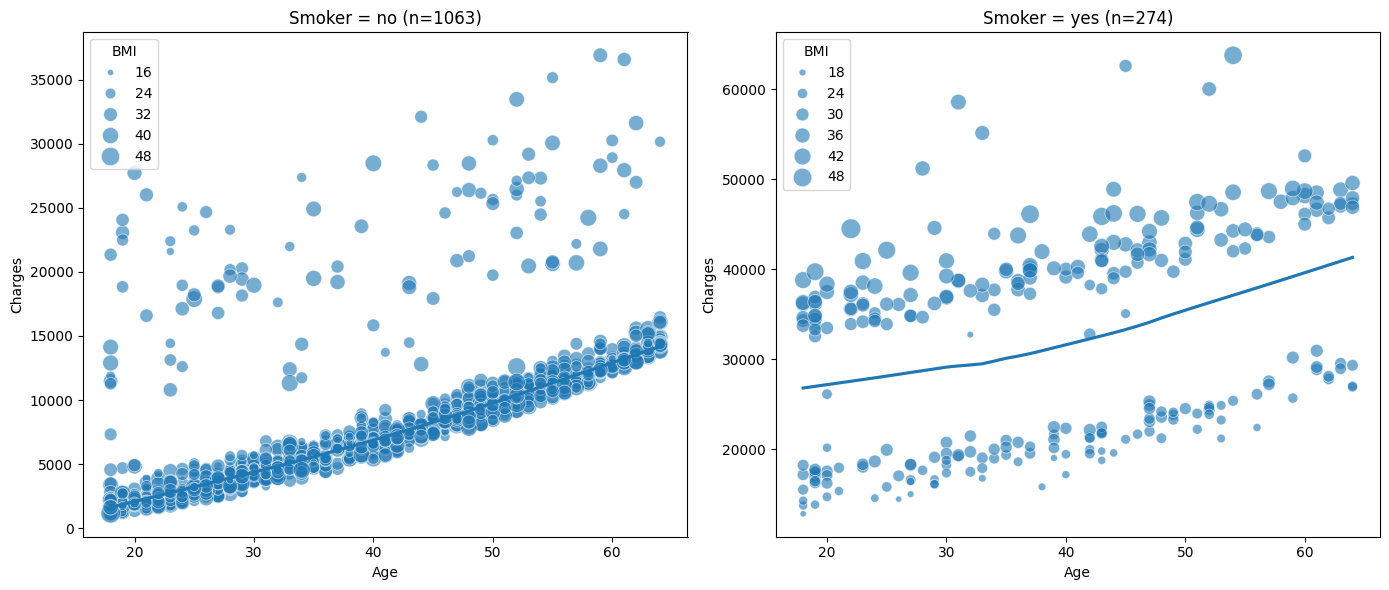

In [8]:
# 2) Side-by-side scatter: Smokers vs Non-smokers (size = BMI, regression curve)
plt.figure(figsize=(14,6))
smoker_vals = df['Smoker'].unique()
for i, s in enumerate(sorted(smoker_vals)):
    ax = plt.subplot(1, len(smoker_vals), i+1)
    d = df[df['Smoker'] == s]
    sns.scatterplot(data=d, x='Age', y='Charges', size='BMI', sizes=(20,200),
                    alpha=0.6, ax=ax)
    sns.regplot(data=d, x='Age', y='Charges', scatter=False, lowess=True, ax=ax)
    ax.set_title(f"Smoker = {s} (n={len(d)})")
    ax.set_xlabel("Age"); ax.set_ylabel("Charges")
plt.tight_layout()
plt.show()


What you’ll see: how the Age→Charges relationship differs between smokers and non-smokers; size shows BMI.

3) Boxplots / violin plots: Charges by BMI category, split by Smoker

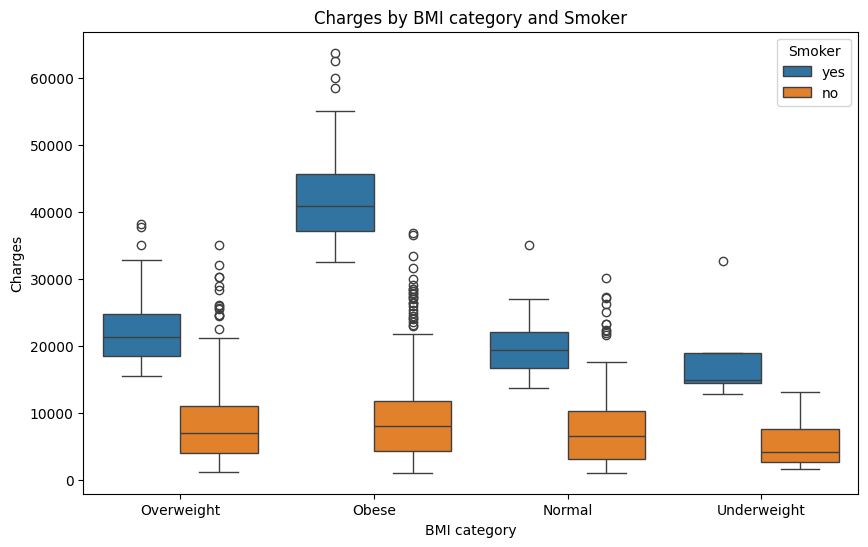

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='BMI_Cat', y='Charges', hue='Smoker')
plt.title("Charges by BMI category and Smoker")
plt.ylabel("Charges"); plt.xlabel("BMI category")
plt.legend(title='Smoker')
plt.show()


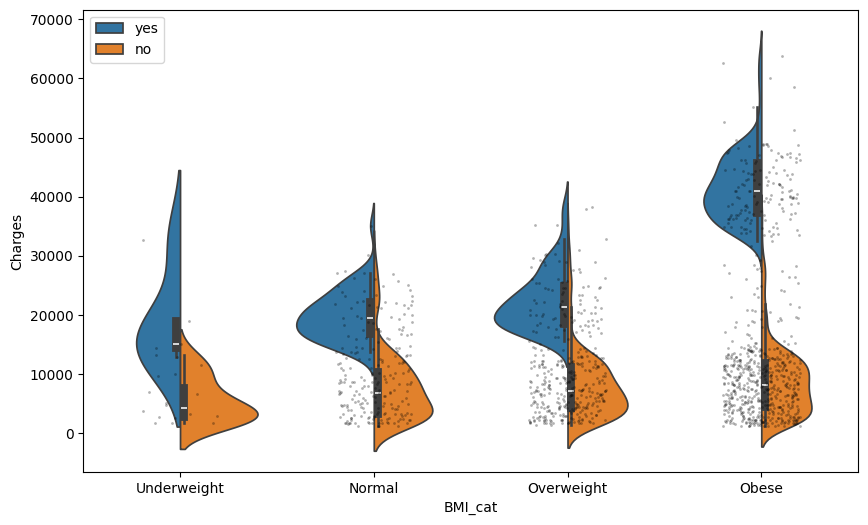

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='BMI_cat', y='Charges', hue='Smoker', split=True)
sns.stripplot(data=df, x='BMI_cat', y='Charges', color='k', size=2, alpha=0.3, jitter=0.2)
plt.show()
# 3) Boxplot: Charges by BMI category and Smoker

Small multiples (FacetGrid): each row BMI\_cat x column Smoker

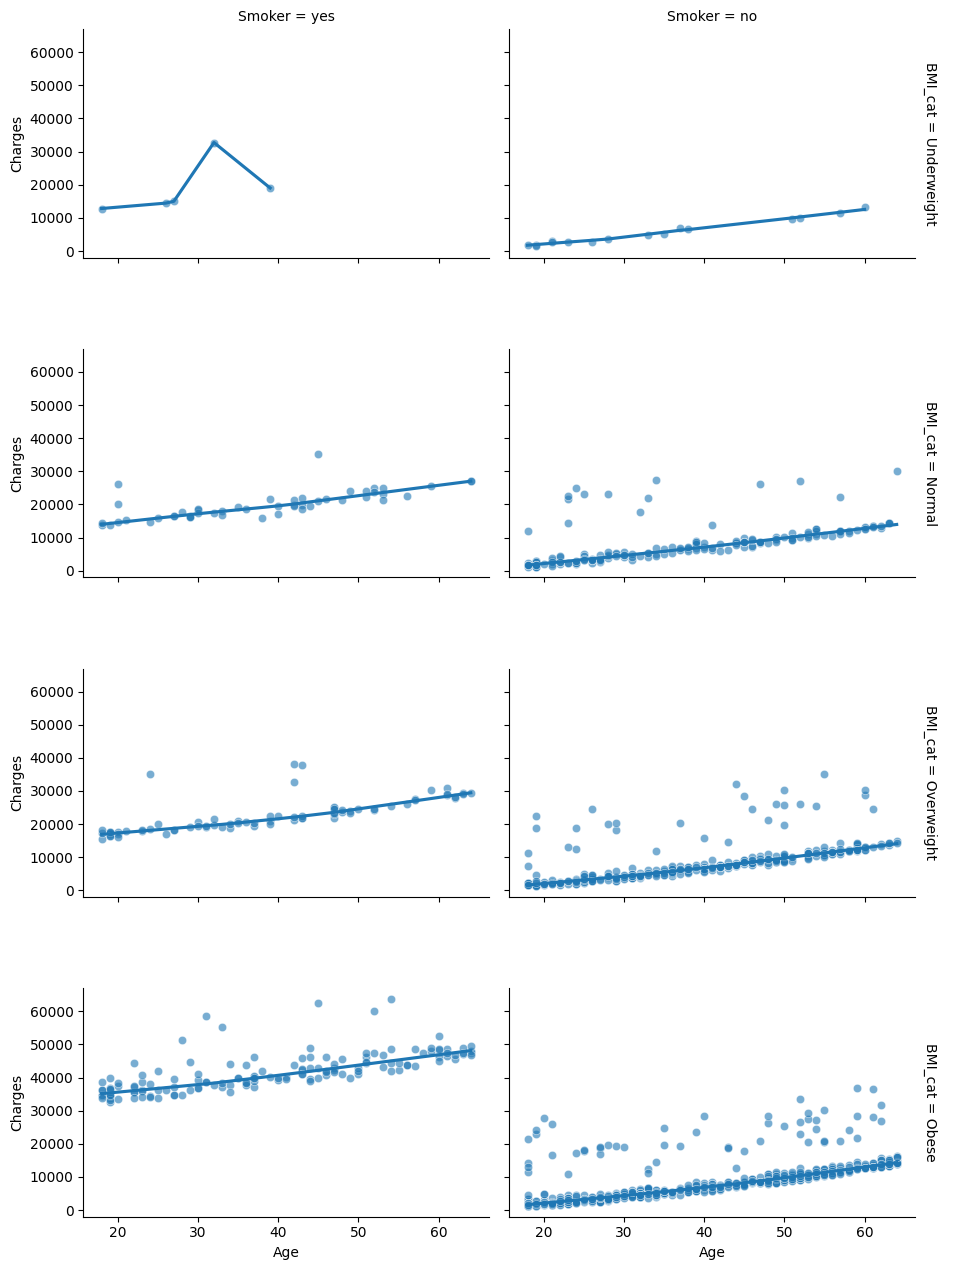

In [11]:
g = sns.FacetGrid(df, row='BMI_cat', col='Smoker', height=3.2, aspect=1.5, margin_titles=True)
g.map_dataframe(sns.scatterplot, x='Age', y='Charges', alpha=0.6)
g.map_dataframe(sns.regplot, x='Age', y='Charges', scatter=False, lowess=True, ci=None)
g.set_axis_labels("Age", "Charges")
for ax in g.axes.flatten():
    ax.ticklabel_format(style='plain', axis='y')  # nicer y tick formatting
plt.subplots_adjust(hspace=0.4)
g.add_legend()
plt.show()


Why: gives an at-a-glance comparison for all BMI × Smoker combinations.

Pairplot + correlation heatmap (numeric overview)

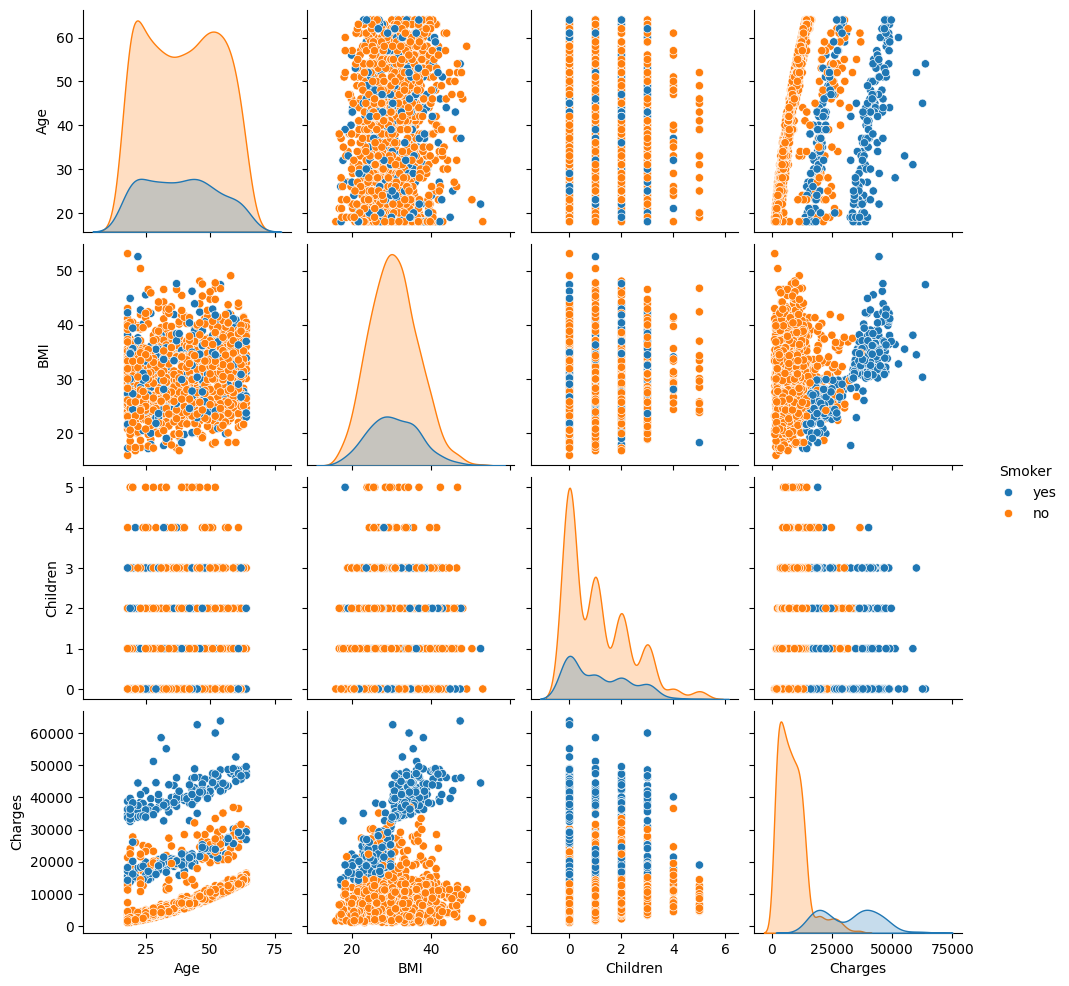

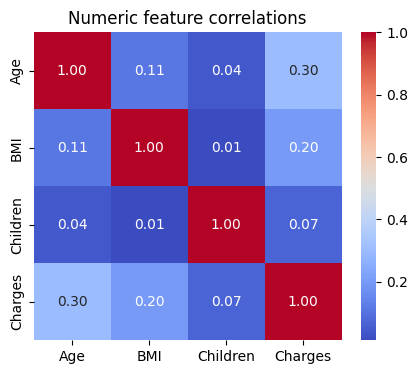

In [12]:
sns.pairplot(df, vars=['Age','BMI','Children','Charges'], hue='Smoker', diag_kind='kde', height=2.5)
plt.show()

corr = df[['Age','BMI','Children','Charges']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Numeric feature correlations")
plt.show()


Regression plots / lmplot to quantify differences

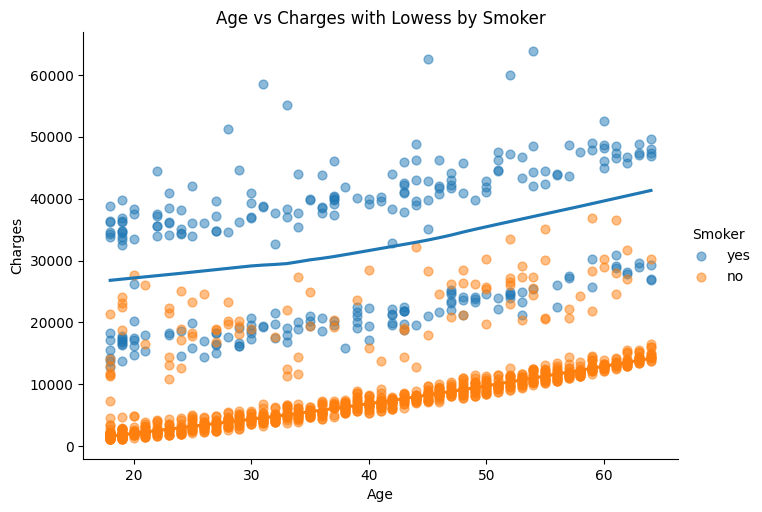

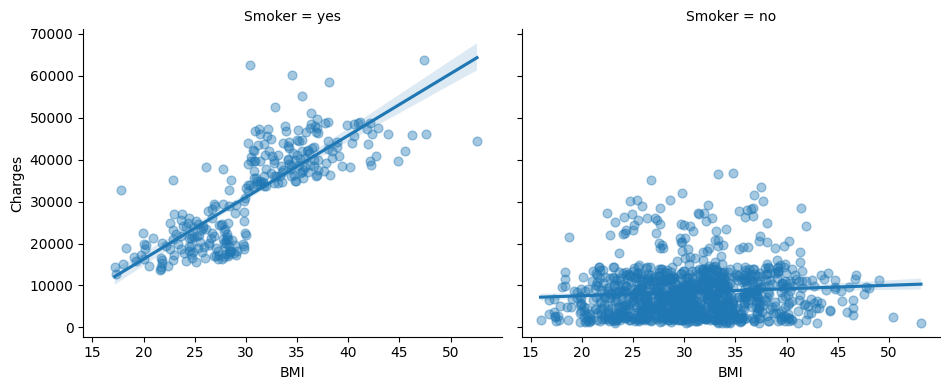

In [13]:
# Single plot with regression lines by Smoker
sns.lmplot(x='Age', y='Charges', hue='Smoker', data=df, height=5, aspect=1.4,
           scatter_kws={'alpha':0.5, 's':40}, lowess=True)
plt.title("Age vs Charges with Lowess by Smoker")
plt.show()

# Regression of Charges ~ BMI by Smoker (two panels)
sns.lmplot(x='BMI', y='Charges', col='Smoker', data=df, height=4, aspect=1.2,
           scatter_kws={'alpha':0.4, 's':40})
plt.show()


Group summary statistics & pivot tables

In [14]:
summary = df.groupby(['Smoker','BMI_cat']).agg(
    n = ('Charges','size'),
    mean_charges = ('Charges','mean'),
    median_charges = ('Charges','median'),
    std_charges = ('Charges','std')
).reset_index()
print(summary)
# pivot for nicer table
pivot = summary.pivot(index='BMI_cat', columns='Smoker', values='mean_charges')
print(pivot)


  Smoker      BMI_cat    n  mean_charges  median_charges  std_charges
0     no  Underweight   16   5485.056875        4249.325  3769.939808
1     no       Normal  176   7734.650170        6669.480  5823.917853
2     no   Overweight  311   8226.088553        7046.720  5910.704727
3     no        Obese  560   8866.158982        8100.095  6102.900225
4    yes  Underweight    5  18809.826000       15006.580  8110.515708
5    yes       Normal   50  19942.223200       19479.905  4202.478888
6    yes   Overweight   75  22491.182800       21348.710  5105.870362
7    yes        Obese  144  41692.809306       40918.315  5829.158331
Smoker                no           yes
BMI_cat                               
Underweight  5485.056875  18809.826000
Normal       7734.650170  19942.223200
Overweight   8226.088553  22491.182800
Obese        8866.158982  41692.809306


C:\Users\hamas\AppData\Local\Temp\ipykernel_18108\3957276737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['Smoker','BMI_cat']).agg(


as you can see i have done this to add numbers and support the visual findings (e.g., “obese smokers have highest mean charges”)

next step is to do the Clustering to identify natural groups (optional exploratory)

c:\Hamas\AI\AI_Projects\Code_Institute_Projects\hackathon_team3\Hackathon2_project_team3\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


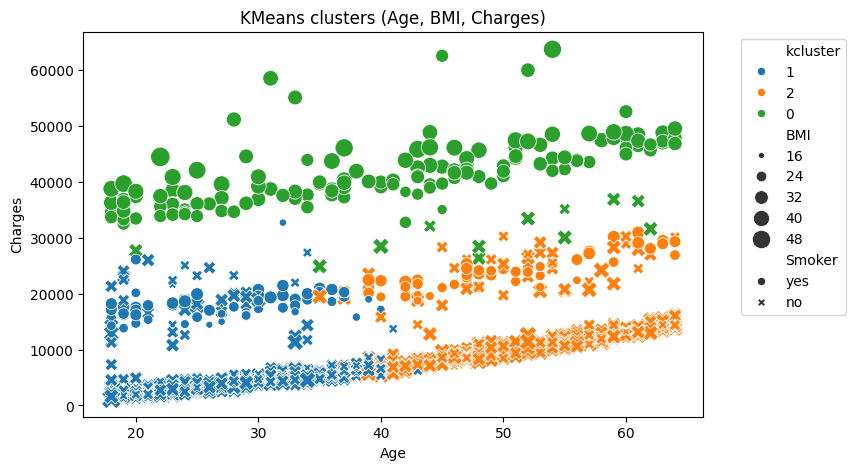

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[['Age','BMI','Charges']].values
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df['kcluster'] = kmeans.labels_.astype(str)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Charges', hue='kcluster', style='Smoker', size='BMI', sizes=(20,200))
plt.title("KMeans clusters (Age, BMI, Charges)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


we could reveal that (2–3 natural clusters (e.g., low-charge/young/low BMI vs high-charge/older/high BMI))

next im going to do a quick statistical test or simple model (to quantify)

* Two-sample t-test (Charges smokers vs non-smokers).
* OLS regression with interaction terms to test whether BMI effect differs by Smoker:

In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Charges ~ Age + BMI + C(Smoker) + Children + Age:C(Smoker) + BMI:C(Smoker)', data=df).fit()
print(model.summary())# as you can see i have done this to add numbers and support the visual findings (e.g., “obese smokers have highest mean charges”)


                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1153.
Date:                Tue, 09 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:44:22   Log-Likelihood:                -13247.
No. Observations:                1337   AIC:                         2.651e+04
Df Residuals:                    1330   BIC:                         2.654e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2742.0959 

This tells you which terms are significant and whether interactions exist.

next step im going to make a Regression lines for Smoker groups (separate equations)
We can use sns.lmplot or sns.regplot to fit regression lines for smokers and non-smokers

<Figure size 1000x600 with 0 Axes>

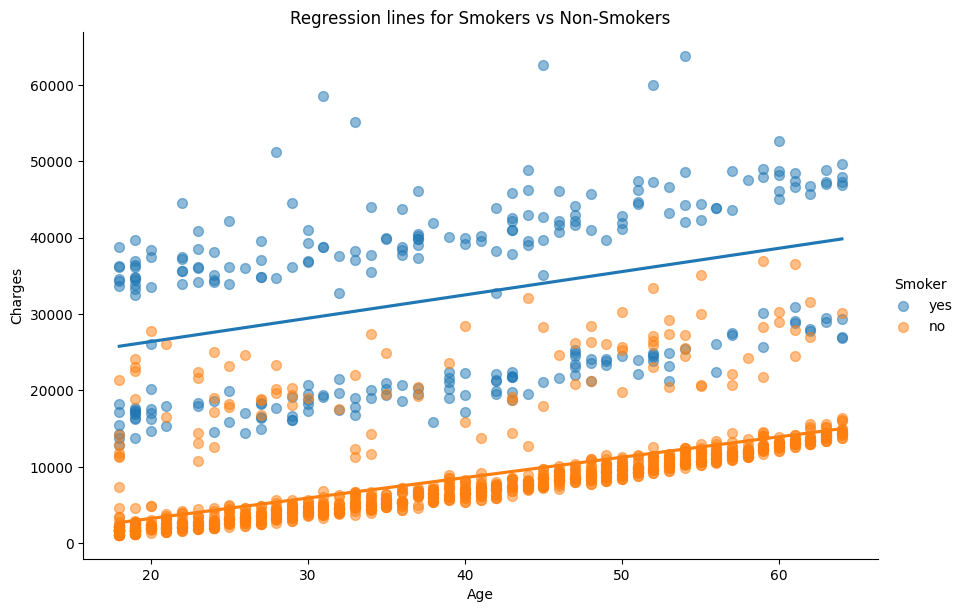

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lmplot(
    x='Age',
    y='Charges',
    hue='Smoker',        # separate lines for smokers vs non-smokers
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.5, 's':50}, 
    ci=None              # no confidence interval, just the line
)
plt.title("Regression lines for Smokers vs Non-Smokers")
plt.show()


This plot fits separate linear regression equations for smokers and non-smokers.

* The slope and intercept are different → showing how Charges increase with Age in each group.
* Smokers’ line will be consistently higher, showing their charges grow faster than non-smokers’.

Step 2: Equations (numerical form)

We can explicitly calculate and display the regression equations:


In [18]:
import statsmodels.formula.api as smf

# Separate regressions
smoker_model = smf.ols('Charges ~ Age', data=df[df['Smoker']=="yes"]).fit()
nonsmoker_model = smf.ols('Charges ~ Age', data=df[df['Smoker']=="no"]).fit()

print("Smokers regression:", smoker_model.params)
print("Non-Smokers regression:", nonsmoker_model.params)


Smokers regression: Intercept    20294.129155
Age            305.237577
dtype: float64
Non-Smokers regression: Intercept   -2085.007771
Age           267.118322
dtype: float64


This action will output equations like:

$$
\text{Charges} = a + b \times \text{Age}
$$

with different $a, b$ for smokers vs non-smokers.

step 3: Add BMI categories into the mix
If you also want equations split by BMI category, we have a look to this below

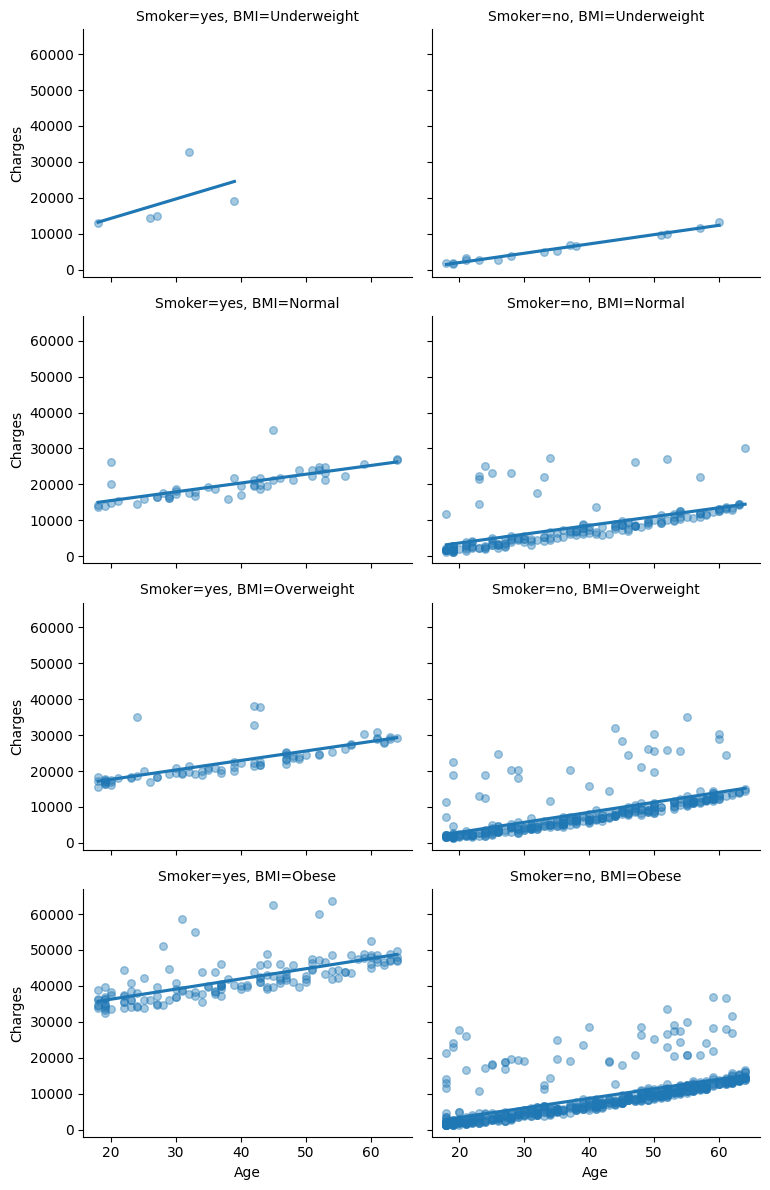

In [19]:
g = sns.lmplot(
    x='Age', y='Charges',
    col='Smoker', row='BMI_cat',
    data=df,
    height=3, aspect=1.3,
    scatter_kws={'alpha':0.4, 's':30},
    ci=None
)
g.set_titles("Smoker={col_name}, BMI={row_name}")
plt.show()


on above as you can see each small panel shows one BMI group and whether they smoke.
* Each has its own regression line (equation).
* You can directly compare slopes (how much Age increases Charges) between different subgroups.

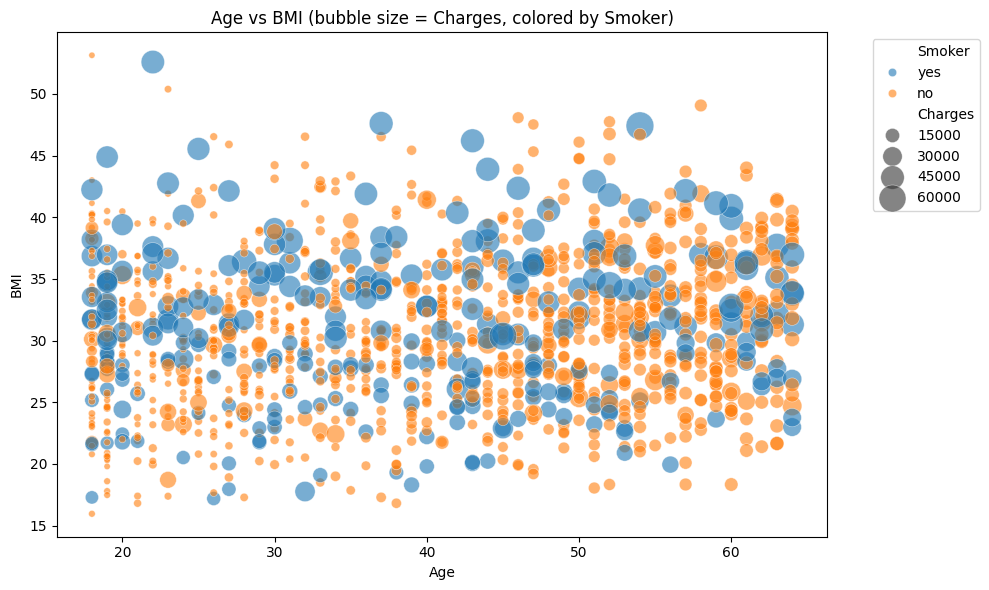

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with bubble sizes and colors
sns.scatterplot(
    data=df,
    x="Age",
    y="BMI",
    size="Charges",       # bubble size ~ charges
    hue="Smoker",         # color by smoker
    sizes=(20, 400),      # min and max bubble sizes
    alpha=0.6,            # transparency for overlapping points
    edgecolor="w"         # white edges for readability
)

plt.title("Age vs BMI (bubble size = Charges, colored by Smoker)")
plt.xlabel("Age")
plt.ylabel("BMI")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()


This scatter plot shows that smoking status and BMI strongly influence medical charges, with smokers (especially with higher BMI) incurring significantly higher healthcare costs than non-smokers

Next step is to add Trendline for Correlation




<Figure size 1000x600 with 0 Axes>

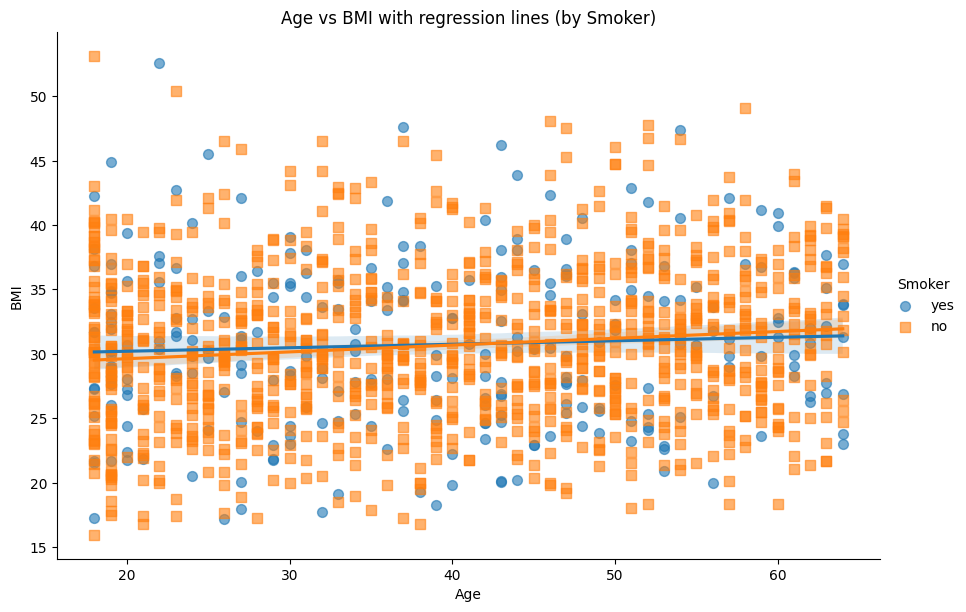

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with regression lines by smoker
sns.lmplot(
    data=df,
    x="Age",
    y="BMI",
    hue="Smoker",       # separate by smoker
    height=6,
    aspect=1.5,
    markers=["o", "s"],  # different markers for each category
    scatter_kws={"s": 50, "alpha":0.6}  # bubble size and transparency
)

plt.title("Age vs BMI with regression lines (by Smoker)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()



This chart helps us understand how BMI relates to age separately for smokers and non-smokers. For example:

You can see whether smoking status correlates with higher/lower BMI.

You can see if BMI tends to increase with age in either group.

Any differences between the regression lines highlight potential effects of smoking on BMI trends.

This 3D scatter on below, helps us see the combined impact of Age, BMI, and Smoking on Charges:

Higher BMI + older age + smoking = highest medical costs.

Non-smokers with lower BMI tend to have lower costs.

You can visually detect trends, clusters, and outliers that might not be obvious in 2D plots.

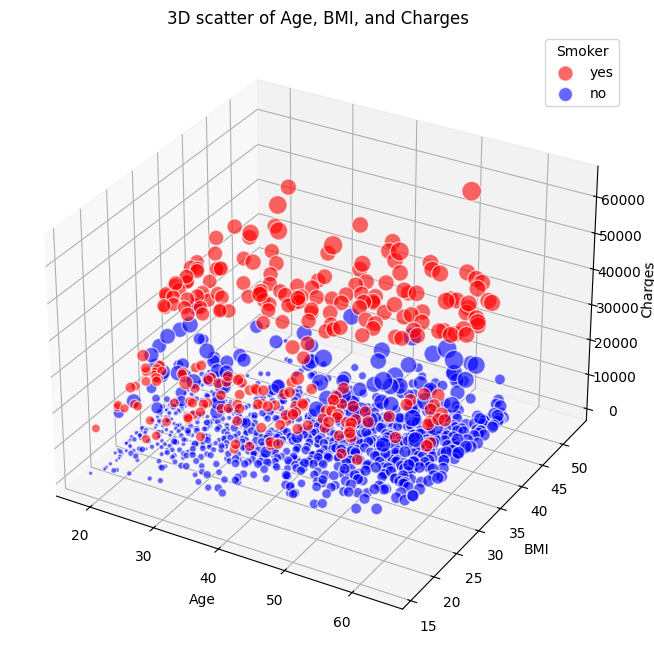

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
import pandas as pd

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map Smoker to colors
colors = {'yes': 'red', 'no': 'blue'}  # adjust based on your dataset values

# Scatter plot
for smoker_status in df['Smoker'].unique():
    subset = df[df['Smoker'] == smoker_status]
    ax.scatter(
        subset['Age'],
        subset['BMI'],
        subset['Charges'],
        s=subset['Charges'] / subset['Charges'].max() * 200,  # scale bubble sizes
        c=colors[smoker_status],
        label=smoker_status,
        alpha=0.6,
        edgecolor='w'
    )

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('3D scatter of Age, BMI, and Charges')

# Legend
ax.legend(title='Smoker')

plt.show()


now I'm going to have look on Charges vs Age, colored by Sex

In [23]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"  # or "browser" to open in web browser

In [11]:
import plotly.express as px
import pandas as pd

# Ensure numeric columns are correct and drop rows with missing values
df_plot = df.copy()
for col in ["Age", "Charges", "BMI"]:
    df_plot[col] = pd.to_numeric(df_plot[col], errors='coerce')
df_plot = df_plot.dropna(subset=["Age", "Charges", "BMI"])

# Quick scatter plot
fig = px.scatter(
    df_plot,
    x="Age",
    y="Charges",
    color="Sex",                 # color by sex
    size="BMI",                  # bubble size = BMI
    hover_data=["Smoker", "Region", "Children"],
    title="Charges vs Age, colored by Sex",
    size_max=30                  # optional: control max bubble size
)

fig.show()


You can see that , Charges increase with age, but the rate might differ between sexes.

High BMI often corresponds to higher charges, independent of sex or age.

Smoker status, region, and number of children provide additional explanatory context for individual variations.

The plot helps identify clusters, trends, and outliers visually, making it easier to understand the combined effects of Age, Sex, BMI, and other factors on medical costs.

final step of this basic visualization is to Combined view (facet by Sex and Region)

In [12]:
fig = px.scatter(
    df,
    x="Age",
    y="Charges",
    color="Smoker",               # smoking is a key driver
    facet_col="Sex",              # split columns by sex
    facet_row="Region",           # split rows by region
    size="BMI",
    hover_data=["Children"],
    title="Charges vs Age, split by Sex and Region"
)
fig.show()


as you can see on above plots , Smoking is the strongest driver of charges, amplified by higher BMI.

Age also contributes, but its effect varies slightly by sex and region.

Regional and sex differences exist, showing that healthcare costs are not uniform across populations.

Faceting makes it easy to compare subgroups, identify outliers, and understand complex interactions between multiple variables.

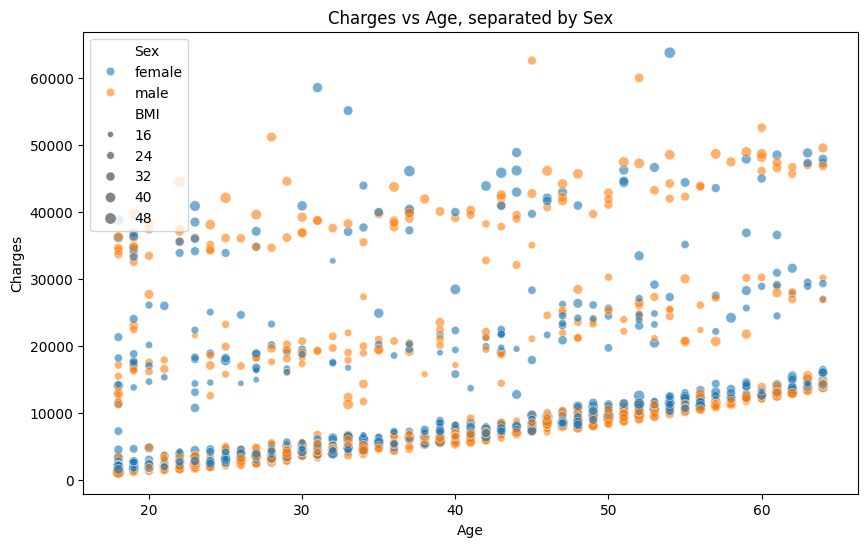

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Age",
    y="Charges",
    hue="Sex",            # separate by sex
    size="BMI",           # optional: bubble size = BMI
    alpha=0.6
)
plt.title("Charges vs Age, separated by Sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


here is using Hue functions to find out the Charges vs Age, hue = Sex
* This lets us see if one sex tends to have higher charges at given ages.


next step is to sort out the Charges vs Age, hue = Region

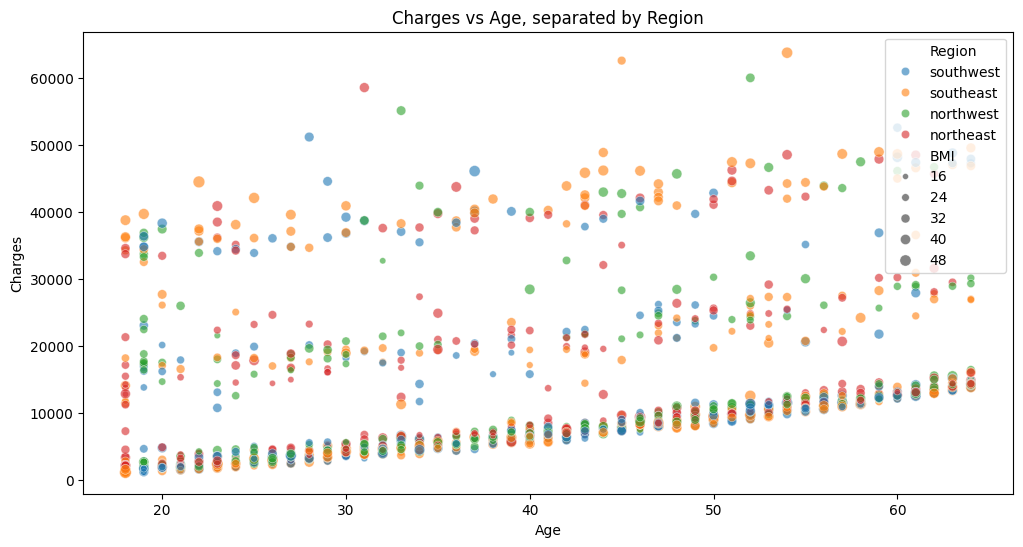

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="Age",
    y="Charges",
    hue="Region",         # separate by region
    size="BMI",
    alpha=0.6
)
plt.title("Charges vs Age, separated by Region")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


region (northeast, northwest, southeast, southwest)

* Shows if geography has a role in charges when we control for age.

Charges generally increase with age, but the rate can differ by region.

The plot helps identify clusters, trends, and outliers in the data, showing how Age, BMI, and Region interact to affect healthcare costs.

the very final visualization here is to Strip & Bar Plots with Plotly (Age, Region, Sex)


In [13]:
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("Dataset/Cleaned/df_transformed.csv")

# Common template for all plots
template_style = "plotly_white"

# --- 1. Age distribution by Region (Strip Plot) ---
px.strip(
    df,
    x="Region",
    y="Age",
    color="Region",
    stripmode="overlay",  # overlay points
    title="Age Distribution across Regions",
    template=template_style
).show()

# --- 2. Age distribution by Sex (Strip Plot) ---
px.strip(
    df,
    x="Sex",
    y="Age",
    color="Sex",
    stripmode="overlay",
    title="Age Distribution by Sex",
    template=template_style
).show()

# --- 3. Average Age by Region & Sex (Bar Chart) ---
avg_age = df.groupby(["Region", "Sex"], as_index=False)["Age"].mean()

px.bar(
    avg_age,
    x="Region",
    y="Age",
    color="Sex",
    barmode="group",
    title="Average Age by Region and Sex",
    template=template_style
).show()


as you can see in my final step , Distribution & summary together: Strip plots show the full distribution and outliers, while the bar chart shows average values.

Demographic patterns: You can understand how age varies by sex and region, spot outliers, and detect clusters.
Age differences by sex: You can quickly see if one sex tends to be younger or older on average.

Age range & spread: How similar or different are male and female age distributions.

Outliers: Unusually young or old patients are easy to spot for each sex.

---

# Conclusions & Next Steps:

### Conclusions:
- Data visualizations highlighted the strong influence of smoking status and BMI on medical charges.
- Smokers, especially those with higher BMI, consistently showed the highest charges across all visual analyses.
- Age was positively associated with charges, but its effect was amplified for smokers and those with higher BMI.
- Regional and sex-based differences in charges and age distributions were observed, however they were less impactful compared than smokers and BMI
- Visualizations effectively revealed clusters, trends, and outliers, supporting deeper understanding of the dataset's key drivers.

### Next Steps:

* Use findings to create a dashboard focusing on answering our hypothesis
* Use the most clear and intuitive plots 
* Create dashboard design on Balsamiq
* Follow dashboard design made on Balsamiq in Power BI 
* Prepare presentation showing findings